In [1]:
import pandas as pd
import seaborn as snb

In [3]:
import matplotlib.pyplot as plt
df = pd.read_csv("game data.csv")
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Days          8 non-null      int64 
 1   Outlook       8 non-null      object
 2   Temprature    8 non-null      object
 3   Routine       8 non-null      object
 4   Wear Jacket?  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


In [7]:
df = df.drop('Days',axis=1)

In [8]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label = LabelEncoder()

In [13]:
x = df.drop('Wear Jacket?',axis=1)

In [14]:
y = df['Wear Jacket?']

In [15]:
y.head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: Wear Jacket?, dtype: object

In [16]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [20]:
x.Outlook = label.fit_transform(df[['Outlook']])
x.Temprature = label.fit_transform(df[['Temprature']])
x.Routine = label.fit_transform(df[['Routine']])

In [21]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [25]:
dtc.fit(x,y)

DecisionTreeClassifier()

In [26]:
dtc.predict([[1,0,0]])

array(['No'], dtype=object)

In [27]:
dtc.predict([[1,1,0]])

array(['No'], dtype=object)

In [28]:
dtc.predict([[1,0,1]])

array(['Yes'], dtype=object)

In [29]:
from sklearn import tree

[Text(200.88000000000002, 190.26, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(133.92000000000002, 135.9, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(200.88000000000002, 81.53999999999999, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

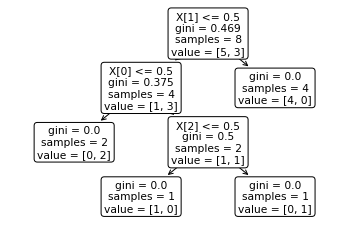

In [36]:
tree.plot_tree(dtc,rounded=True,filled=None)

In [37]:
x.columns 

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')